In [20]:
################################################################################
# PART #1
################################################################################


#I only did parts 1 and 2, per what I remember in class!
import string
import json
import pandas as pd
import os

def countWordsUnstructured(filename):
    d = {}
    for line in open(filename,'r'):
        t = line.split(' ')
        for i in t:
            try:
                d[i.strip(string.punctuation+':-.,\n\t').replace(",","")]+=1 #I threw in the .replace due to some numbers with commas being counted as words. E.g. '3,000'
            except:
                d[i.strip(string.punctuation+':-.,\n\t').replace(",","")]=1
    return d
    # This function should count the words in an unstructured text document
    # Inputs: A file name (string)
    # Outputs: A dictionary with the counts for each word
    # +1 bonus point for removing punctuation from the wordcounts
    
# Test your part 1 code below.

################################################################################
# PART 2
################################################################################
    
def generateSimpleCSV(targetfile, wordCounts): 
    try:
        with open(targetfile,'a') as file:
            file.write("Word,Count\n")
            for key,value in wordCounts.items():
                file.write(str(key)+","+str(value)+'\n')
        file.close()

    except:
        print("You done messed up!")
    # This function should transform a dictionary containing word counts to a
    # CSV file. The first row of the CSV should be a header noting: 
    # Word, Count
    # Inputs: A word count list and a name for the target file
    # Outputs: A new CSV file named targetfile containing the wordcount data
    
# Test your part 2 code below
    
################################################################################
# PART 3
################################################################################
def countWordsMany(directory):  
    d={}
    #d2 =[countWordsUnstructured(file) for file in os.scandir(directory)]
    d2 =[file.name for file in os.scandir("./"+directory)]
    for i in d2:
        d[i]=countWordsUnstructured(directory+"/"+i)
    return d
    
    # This function should create a dictionary of word count dictionaries
    # The dictionary should have one dictionary per file in the directory
    # Each entry in the dictionary should be a word count dictionary
    # Inputs: A directory containing a set of text files
    # Outputs: A dictionary containing a word count dictionary for each
    #          text file in the directory
    
# Test your part 3 code below
#t = countWordsMany("state-of-the-union-corpus-1989-2017")
#print(t)

################################################################################
# PART 4
################################################################################
def generateDirectoryCSV(wordCounts, targetfile):
    with open (targetfile,'a') as file:
        file.write("Filename,Word,Count\n")
        for key,value in wordCounts.items():
            for a,b in value.items():   
                file.write(str(key)+","+str(a)+","+str(b)+'\n')
    file.close()
    return
    # This function should create a CSV containing the word counts generated in
    # part 3 with the header: 
    # Filename, Word, Count
    # Inputs: A word count dictionary and a name for the target file
    # Outputs: A CSV file named targetfile containing the word count data
    
# Test your part 4 code below
    
################################################################################
# PART 5
################################################################################
def generateJSONFile(wordCounts, targetfile): 
    with open(targetfile, 'w') as file:
        json.dump(wordCounts,file,indent=4)
    file.close()
    return
    # This function should create an containing the word counts generated in
    # part 3. Architect your JSON file such that the hierarchy will allow
    # the user to quickly navigate and compare word counts between files. 
    # Inputs: A word count dictionary and a name for the target file
    # Outputs: An JSON file named targetfile containing the word count data
    
# Test your part 5 code below

################################################################################
# PART 6
################################################################################
def searchCSV(csvfile, word): 
    count=0
    try:
        df = pd.read_csv(csvfile)
        df_word = df[df['Word']==word]
        t = [x for x in df_word[df_word['Count']==df_word['Count'].max()].reset_index().Filename]
        count = [x for x in df_word[df_word['Count']==df_word['Count'].max()].reset_index().Count]

    except:
        t="No file contained that word."
    t+=count
    print("Datapoints needed to compute: "+str(len(df_word)))
    return t
    # This function should search a CSV file from part 4 and find the filename
    # with the largest count of a specified word
    # Inputs: A CSV file to search and a word to search for
    # Outputs: The filename containing the highest count of the target word
    
def searchJSON(JSONfile, word): 
    with open(JSONfile, 'r') as file:
        d = json.load(file)
    t=0
    length = 0
    x="No file contained that word"
    for key,value in d.items():
        length+=1
        try:
            if value[word]>t:
                t=value[word]
                x=[key]
            elif value[word]==t:
                x.append(key)
        except:
            pass
    x.append(t)
    print("Datapoints needed to compute: "+str(length))
    file.close()
    return x
    # This function should search a JSON file from part 5 and find the filename
    # with the largest count of a specified word
    # Inputs: An JSON file to search and a word to search for
    # Outputs: The filename containing the highest count of the target word
    
# Test your part 6 code to find which file has the highest count of a given word

# +1 bonus point for figuring out how many datapoints you had to process to 
# compute this value


################################################################################
# PART 7
################################################################################


#In the starter code, you also now have additional data on different presidents. 
#Design a database schema that allows you to store this data with your word counts
#from the State of the Union addresses. Make sure to consider how you would connect
#between different tables, how to integrate all of the data from both sources, and 
#how to minimize the amount of redundant information (you should have no duplicate 
#information in your final design). 

#Table 1: sotu_word_counts
#      Column 1 =  text “filename”
#      Column 2 = text “word”
#      Column 3 = integer “count”


#Table 2: us_presidents
#     Column 1 =  int ‘number’,
#     Column 2 = date start
#     Column 3 = date end 
#     Column 4 = varchar president
#     Column 5 = varchar prior 
#     Column 6 = varchar party
#     Column 7 = varchar vice

# By combining these two tables together in this fashion, the database would have all of the information needed
# without having any repeating or redundant information. Connections could be made between the tables by focusing
# on president nnames or by years.


################################################################################
# PART 8
################################################################################


#Create a new database using Python as part of your parsers.py code that implements
#this schema. The inputs to this function should be a database name.





#   import sqlite3
#   conn = sqlite.connect(‘presidents.db’) # Set up a connection to db
#   c = conn.cursor() # allow access with a mouse
#   c.execute(‘’’CREATE TABLE sotu_word_counts (filename text, word text, count integer)’’’) # ask connected to execute sql command
#   c.execute(‘’’CREATE TABLE us_presidents (number integer, start date, end date, president text, prior text, party text, vice text)’’’) # ask connected to execute sql command
#   conn.commit() # save (commit) the changes
#   conn.close() # Close the connection








In [4]:
import pandas as pd
df = pd.read_csv('CDC_Obesity_Data.csv')

In [5]:
df = pd.read_csv("CDC_Obesity_Data.csv")

This dataset contains data about lots of different factors related to obesity. The "Question" column allows you to look at the specific factors that data row describes. The Data_Value column provides you with a percentage measure for each factor. The other columns provide additional demographic data about the datapoint represented by that row such as age ranges, education, and gender. For the following questions, assume that X is a random variable for the Question field, Y is a random variable for the Data_Value field, and T is a random variable for the YearStart field. 
1.  What does A equal in the expression X ∈ A?
  ####  A is the set of all questions in the Question Field.
2.  What does B equal in the expression B=∀Y,∑yi?
  #### B is the sum of all of the values of Y (Data_Value values).
    
3. The kind of data distribution you have determines the kinds of analyses you can conduct on a variable. Plot the distribution of Y for X = "Percentage of adults aged 18 years and older who have obesity." What distribution does this data follow?
    


In [21]:
import matplotlib as plt
import seaborn as sb
import numpy as np
% matplotlib inline

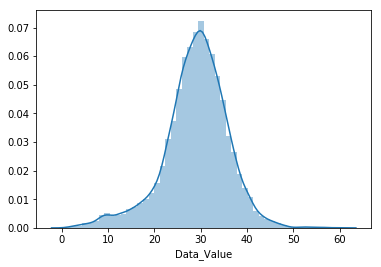

In [38]:
df_x = df[df['Question']=="Percent of adults aged 18 years and older who have obesity"]
df_x = df_x[df_x['Data_Value'].notnull()==True]
df_x['Data_Value']
#['Data_Value'].notnull()
sb.distplot(df_x['Data_Value'])

4 Plot the same distribution Y as a function of T with T on the x-axis and Y on the y-axis. What distribution does this data follow? What does this distribution tell us about obesity rates in the US?


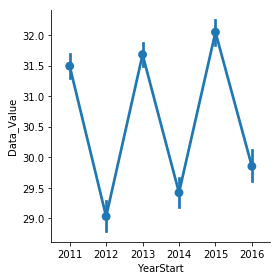

In [15]:
#df_t = df[df['Question']=="YearStart"]['Data_Value'].notnull()
sb.factorplot(x='YearStart',y='Data_Value',data=df)
#plt.show()


In [27]:
np.mean(df[df['YearStart']==2016]['Data_Value'])

29.850825951639912

In [29]:
df[df['YearStart']==2016]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
48772,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Total,Total,OVR,OVERALL
48773,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Gender,Male,GEN,MALE
48774,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Gender,Female,GEN,FEMALE
48775,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Education,Less than high school,EDU,EDUHS
48776,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Education,High school graduate,EDU,EDUHSGRAD
48777,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Education,Some college or technical school,EDU,EDUCOTEC
48778,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Education,College graduate,EDU,EDUCOGRAD
48779,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
48780,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Age (years),25 - 34,AGEYR,AGEYR2534
48781,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Age (years),35 - 44,AGEYR,AGEYR3544
